## Advanced Features

### 1. Token Features
- **cwc_min**: This is the ratio of the number of common words to the length of the smaller question
- **cwc_max**: This is the ratio of the number of common words to the length of the larger question
- **csc_min**: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
- **csc_max**: This is the ratio of the number of common stop words to the larger stop word count among the two questions
- **ctc_min**: This is the ratio of the number of common tokens to the smaller token count among the two questions
- **ctc_max**: This is the ratio of the number of common tokens to the larger token count among the two questions
- **last_word_eq**: 1 if the last word in the two questions is same, 0 otherwise
- **first_word_eq**: 1 if the first word in the two questions is same, 0 otherwise

### 2. Length Based Features
- **mean_len**: Mean of the length of the two questions (number of words)
- **abs_len_diff**: Absolute difference between the length of the two questions (number of words)
- **longest_substr_ratio**: Ratio of the length of the longest substring among the two questions to the length of the smaller question

### 3. Fuzzy Features
- **fuzz_ratio**: fuzz_ratio score from fuzzywuzzy
- **fuzz_partial_ratio**: fuzz_partial_ratio from fuzzywuzzy
- **token_sort_ratio**: token_sort_ratio from fuzzywuzzy
- **token_set_ratio**: token_set_ratio from fuzzywuzzy

## Advanced Features for Question Pair Similarity

### 1. Token Features

These features are based on the comparison of tokens (words) between two questions:

- **cwc_min (Common Word Count Minimum):**  
  This is the ratio of the number of common words to the length of the smaller question.  
  **Example:**  
  - Question 1: "How to learn Python?" (4 words)  
  - Question 2: "Best way to learn Python?" (5 words)  
  - Common words: "learn", "Python" (2 words)  
  - `cwc_min = 2 / 4 = 0.5`

- **cwc_max (Common Word Count Maximum):**  
  This is the ratio of the number of common words to the length of the larger question.  
  **Example:**  
  - Using the same questions:  
  - `cwc_max = 2 / 5 = 0.4`

- **csc_min (Common Stop Word Count Minimum):**  
  This is the ratio of the number of common stop words (e.g., "to", "how", "the") to the smaller stop word count among the two questions.  
  **Example:**  
  - Stop words in Question 1: "How to" (2 words)  
  - Stop words in Question 2: "Best way to" (3 words)  
  - Common stop words: "to" (1 word)  
  - `csc_min = 1 / 2 = 0.5`

- **csc_max (Common Stop Word Count Maximum):**  
  This is the ratio of the number of common stop words to the larger stop word count among the two questions.  
  **Example:**  
  - Using the same questions:  
  - `csc_max = 1 / 3 ≈ 0.33`

- **ctc_min (Common Token Count Minimum):**  
  This is the ratio of the number of common tokens (words) to the smaller token count among the two questions.  
  **Example:**  
  - Common tokens: "learn", "Python" (2 words)  
  - `ctc_min = 2 / 4 = 0.5`

- **ctc_max (Common Token Count Maximum):**  
  This is the ratio of the number of common tokens to the larger token count among the two questions.  
  **Example:**  
  - `ctc_max = 2 / 5 = 0.4`

- **last_word_eq (Last Word Equal):**  
  Checks if the last word in both questions is the same. Returns 1 if true, otherwise 0.  
  **Example:**  
  - Question 1: "How to learn Python?"  
  - Question 2: "Best way to learn Python?"  
  - Both end with "Python".  
  - `last_word_eq = 1`

- **first_word_eq (First Word Equal):**  
  Checks if the first word in both questions is the same. Returns 1 if true, otherwise 0.  
  **Example:**  
  - Question 1: "How to learn Python?"  
  - Question 2: "Best way to learn Python?"  
  - Different first words: "How" vs "Best".  
  - `first_word_eq = 0`

### 2. Length-Based Features

These features consider the lengths of the questions:

- **mean_len (Mean Length):**  
  The mean of the lengths of the two questions (in terms of word count).  
  **Example:**  
  - Length of Question 1: 4 words  
  - Length of Question 2: 5 words  
  - `mean_len = (4 + 5) / 2 = 4.5`

- **abs_len_diff (Absolute Length Difference):**  
  The absolute difference between the lengths of the two questions.  
  **Example:**  
  - `abs_len_diff = |4 - 5| = 1`

- **longest_substr_ratio (Longest Substring Ratio):**  
  The ratio of the length of the longest common substring to the length of the smaller question.  
  **Example:**  
  - Longest common substring: "learn Python" (2 words)  
  - Length of smaller question: 4 words  
  - `longest_substr_ratio = 2 / 4 = 0.5`

### 3. Fuzzy Features

These features use fuzzy matching scores to measure the similarity between questions:

- **fuzz_ratio:**  
  Measures the similarity between the two strings using character-based comparison.  
  **Example:**  
  - Fuzz Ratio between "How to learn Python?" and "Best way to learn Python?" might be around 70-80 depending on exact wording.

- **fuzz_partial_ratio:**  
  Measures the similarity of the most similar substring in one question to the other question.  
  **Example:**  
  - Could return a higher score if there's a close partial match, e.g., "learn Python" in both questions.

- **token_sort_ratio:**  
  Compares the similarity after sorting the tokens alphabetically.  
  **Example:**  
  - Questions "How to learn Python?" and "Python learn how to?" will have a high score, as sorting makes them identical.

- **token_set_ratio:**  
  Measures the similarity considering the intersection of tokens. It accounts for duplicated tokens.  
  **Example:**  
  - Might give a high score if there's a significant overlap in tokens, even if in different order or extra words are present.

These features help in capturing various aspects of textual similarity between question pairs, enhancing the performance of models designed to detect duplicate questions.


# Importing the Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [4]:
df = pd.read_csv('train.csv')

In [5]:
new_df = df.sample(30000,random_state=2)

In [8]:
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   

                                                question2  is_duplicate  
398782  What is the best marketing automation tool for...             1  
115086  I am quite poor and I want to be very rich. Wh...             0  
327711  T.I.E.T to Thapar University to Thapar Univers...             0  
367788  My boyfriend doesnt feel guilty when he hurts ...             0  
151235  What was the reason behind the Bhopal gas trag...             0

### Explanation of `preprocess(q)` Function

The `preprocess(q)` function is designed to clean and standardize text input, such as a question or sentence. Below is a step-by-step explanation of what the function does:

1. **Convert to Lowercase and Remove Extra Spaces**: 
   - The input text is converted to lowercase, and any leading or trailing spaces are removed to ensure consistency.

2. **Replace Special Characters with Words**: 
   - Certain special characters (like `%`, `$`, `₹`, `€`, `@`) are replaced with their word equivalents (`percent`, `dollar`, `rupee`, `euro`, `at`). This helps retain their meaning in the text.

3. **Remove Specific Patterns**: 
   - The pattern `[math]` is removed from the text. This is likely a placeholder or tag that doesn't contribute meaningfully to the content.

4. **Replace Large Numbers with Abbreviations**: 
   - Large numbers are converted to more readable formats: 
     - `'b'` for billion (1,000,000,000),
     - `'m'` for million (1,000,000),
     - `'k'` for thousand (1,000).
   - This standardizes the representation of large numbers.

5. **Expand Contractions**: 
   - Common English contractions (like "can't" to "cannot", "you're" to "you are") are expanded using a predefined list. This step ensures that all words are in their full form, which can be important for text analysis.

6. **Remove HTML Tags**: 
   - HTML tags are stripped from the text, leaving only plain text. This is done using a library called `BeautifulSoup`.

7. **Remove Punctuation**: 
   - Non-word characters (such as punctuation) are removed and replaced with spaces. This helps in standardizing the input text by removing unnecessary symbols.

#### Example
For example, if you input:  
`"Isn't it amazing @ 50% of people use $10,000,000 in math <div>calculations</div>?"`

The function processes it to:  
`"is not it amazing at 50 percent of people use 10m in math calculations"`

This cleaned version is more suitable for further analysis, such as machine learning or text processing tasks.


# Text Preprocessing Function for Normalizing and Cleaning Text Data

In [9]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

## Testing Preprocessing..

In [11]:
preprocess("Isn't it amazing @ 50% of people use $10,000,000 in math <div>calculations</div>?")

'is not it amazing at 50 percent of people use dollar 10m in math calculations'

## Applying Text Preprocessing to DataFrame Columns

In [16]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [17]:
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086    i am poor but i want to invest what should i do   
327711  i am from india and live abroad i met a guy fr...   
367788  why do so many people in the u s hate the sout...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  
398782  what is the best marketing automation tool for...             1  
115086  i am quite poor and i want to be very rich wha...             0  
327711  t i e t to thapar university to thapar univers...             0  
367788  my boyfriend doesnt feel guilty when he hurts ...             0  
151235  what was the reason behind the bhopal gas tragedy             0

## Adding Length Features for Text Columns in DataFrame

In [25]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

## Adding Number of Words Features for Text Columns in DataFrame



### Calculate the Number of Words in Each Question

- **For `question1` Column:**
  - A new column `q1_num_words` is created.
  - For each entry in `question1`, the number of words is computed by splitting the text based on spaces and counting the length of the resulting list.

- **For `question2` Column:**
  - A new column `q2_num_words` is created.
  - The number of words in each entry of `question2` is calculated in the same way.

### Display the Updated DataFrame

- The `.head()` method is used to show the first few rows of the updated DataFrame, now including the new columns `q1_num_words` and `q2_num_words`.


In [27]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086    i am poor but i want to invest what should i do   
327711  i am from india and live abroad i met a guy fr...   
367788  why do so many people in the u s hate the sout...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich wha...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  
398782      75      76            13            13           12  
115086      47      55            12            15            7  
327711     102     118            26            20            3  
367788      57     143            13            30            0  
151235      34      49             5             9            3

## Calculate the Number of Common Words Between Two Questions

- **Function `common_words`:**
  - This function calculates the number of common words between two questions in a DataFrame row.
  - **Steps:**
    1. Convert the `question1` and `question2` text to sets of words.
       - Each word is converted to lowercase and stripped of any extra spaces.
    2. Compute the intersection of these two sets to find common words.
    3. Return the count of common words.

**Example Implementation:**
```python
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [31]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [32]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086    i am poor but i want to invest what should i do   
327711  i am from india and live abroad i met a guy fr...   
367788  why do so many people in the u s hate the sout...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich wha...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  
398782      75      76            13            13           12  
115086      47      55            12            15            7  
327711     102     118            26            20            3  
367788      57     143            13            30            0  
151235      34      49             5             9            3

## Calculate the Total Number of Unique Words in Two Questions


- **Function Definition: `total_words(row)`**
  - **Purpose:** Computes the total number of unique words in both `question1` and `question2` for each row of the DataFrame.
  - **Steps:**
    1. **Tokenization and Normalization:**
       - Convert each word in `question1` and `question2` to lowercase and strip any leading or trailing spaces.
       - Split the questions into sets of words (`w1` and `w2`).
    2. **Calculate Unique Words:**
       - Calculate the number of unique words in `question1` by taking the length of `w1`.
       - Calculate the number of unique words in `question2` by taking the length of `w2`.
    3. **Compute Total Words:**
       - Sum the counts of unique words from `question1` and `question2`.
       - Return this total count.

In [33]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [35]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086    i am poor but i want to invest what should i do   
327711  i am from india and live abroad i met a guy fr...   
367788  why do so many people in the u s hate the sout...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich wha...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  
398782      75      76            13            13           12          26  
115086      47      55            12            15            7          22  
327711     102     118            26            20            3          36  
367788      57     143            13            30            0          32  
151235      34      49             5             9            3          13

## Calculate and Add Word Share Column


- **Compute Word Share:**
  - **New Column Definition:** `word_share`
  - **Purpose:** Represents the proportion of common words relative to the total number of unique words in `question1` and `question2` for each row.
  - **Calculation:**
    1. **Formula:**
       ```python
       new_df['word_share'] = round(new_df['word_common'] / new_df['word_total'], 2)
       ```
       - **`word_common`:** Number of common words between `question1` and `question2`.
       - **`word_total`:** Total number of unique words in `question1` and `question2`.
       - **`word_share`:** Ratio of `word_common` to `word_total`, rounded to two decimal places.
  - **Display Updated DataFrame:**
    - Use `.head()` to view the first few rows of the DataFrame, now including the new `word_share` column.

In [36]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086    i am poor but i want to invest what should i do   
327711  i am from india and live abroad i met a guy fr...   
367788  why do so many people in the u s hate the sout...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich wha...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
398782      75      76            13            13           12          26   
115086      47      55            12            15            7          22   
327711     102     118            26            20            3          36   
367788      57     143            13            30            0          32   
151235      34      49             5             9            3          13   

        word_share  
398782        0.46  
115086        0.32  
327711        0.08  
367788        0.00  
151235        0.23

#  Advanced Features: Token-Based Features Extraction


**Function: `fetch_token_features`**

- **Purpose:** To extract various token-based features from two text columns (`question1` and `question2`) and return a list of features.

- **Implementation Details:**

    ```python
    from nltk.corpus import stopwords
    
    def fetch_token_features(row):
        q1 = row['question1']
        q2 = row['question2']
        
        SAFE_DIV = 0.0001 
        STOP_WORDS = stopwords.words("english")
        token_features = [0.0]*8
        
        # Converting the Sentence into Tokens
        q1_tokens = q1.split()
        q2_tokens = q2.split()
        
        # Return default features if any question is empty
        if len(q1_tokens) == 0 or len(q2_tokens) == 0:
            return token_features
        
        # Get the non-stopwords in Questions
        q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
        q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
        
        # Get the stopwords in Questions
        q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
        q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
        
        # Get the common non-stopwords from Question pair
        common_word_count = len(q1_words.intersection(q2_words))
        
        # Get the common stopwords from Question pair
        common_stop_count = len(q1_stops.intersection(q2_stops))
        
        # Get the common Tokens from Question pair
        common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
        
        # Compute Token-Based Features
        token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
        token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
        token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
        token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
        token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
        token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
        
        # Last word of both question is same or not
        token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
        
        # First word of both question is same or not
        token_features[7] = int(q1_tokens[0] == q2_tokens[0])
        
        return token_features
    ```

- **Explanation:**

  1. **Tokenization:**
     - Splits `question1` and `question2` into tokens (words).

  2. **Stop Words Handling:**
     - Identifies and separates stopwords and non-stopwords for both questions.

  3. **Feature Computation:**
     - Calculates the proportion of common non-stopwords and stopwords between the two questions.
     - Computes the proportion of common tokens overall.
     - Checks if the first and last words of both questions are identical.

  4. **Feature List:**
     - Returns a list of 8 features:
       - **Features 0-5:** Ratios of common words/tokens to the number of words/tokens in each question.
       - **Feature 6:** Whether the last words of both questions are identical.
       - **Feature 7:** Whether the first words of both questions are identical.


In [40]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):      #It Is used to fetch 8 token featres 
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

## Extracting and Adding Token Features to DataFrame

In [41]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [43]:
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086    i am poor but i want to invest what should i do   
327711  i am from india and live abroad i met a guy fr...   
367788  why do so many people in the u s hate the sout...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich wha...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...  word_total  \
398782      75      76            13            13  ...          26   
115086      47      55            12            15  ...          22   
327711     102     118            26            20  ...          36   
367788      57     143            13            30  ...          32   
151235      34      49             5             9  ...          13   

        word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
398782        0.46  0.874989  0.874989  0.999980  0.999980  0.923070   
115086        0.32  0.666644  0.499988  0.714276  0.624992  0.583328   
327711        0.08  0.000000  0.000000  0.428565  0.272725  0.149999   
367788        0.00  0.000000  0.000000  0.000000  0.000000  0.000000   
151235        0.23  0.749981  0.599988  0.000000  0.000000  0.599988   

         ctc_max  last_word_eq  first_word_eq  
398782  0.923070           1.0            1.0  
115086  0.466664           1.0            1.0  
327711  0.115384           0.0            0.0  
367788  0.000000           0.0            0.0  
151235  0.333330           1.0            0.0  

[5 rows x 21 columns]

## Extracting Length-Based Features

The `fetch_length_features` function calculates three features related to the lengths of `question1` and `question2`:

1. **Absolute Length Difference:**
   - This feature computes the absolute difference in the number of tokens (words) between `question1` and `question2`. It indicates how different the lengths of the two questions are.

2. **Average Token Length:**
   - This feature calculates the average number of tokens in both questions. It provides a measure of the typical length of the questions.

3. **Longest Common Substring Length:**
   - This feature determines the length of the longest common substring between the two questions using the `distance.lcsubstrings` function. It is normalized by dividing it by the length of the shorter question plus one, which helps avoid division by zero and gives a relative measure of similarity.

The function uses these computations to populate an array `length_features` with the three calculated values. If either question is empty, the function returns an array with zero values.







In [45]:
pip install distance

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/180.3 kB ? eta -:--:--
     ------ --------------------------------- 30.7/180.3 kB ? eta -:--:--
     ------ --------------------------------- 30.7/180.3 kB ? eta -:--:--
     ------------------ ------------------ 92.2/180.3 kB 655.4 kB/s eta 0:00:01
     ------------------ ------------------ 92.2/180.3 kB 655.4 kB/s eta 0:00:01
     ---------------------------- ------- 143.4/180.3 kB 607.9 kB/s eta 0:00:01
     -------------------------------- --- 163.8/180.3 kB 653.6 kB/s eta 0:00:01
     ------------------------------------ 180.3/180.3 kB 516.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16282 sha256=a749d396772e77d5ce9320f31cfd69aab5c33fc9ae77bb1c8184c6e16b9593c3
  Stored in directory: c:\users\gouthum\appda

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [46]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

1. **Applying the `fetch_length_features` Function:**

   ```python
   length_features = new_df.apply(fetch_length_features, axis=1)

- **Purpose:** This line applies the `fetch_length_features` function to each row of the DataFrame `new_df`.

- **Function:** The function computes three length-related features for each row based on the `question1` and `question2` columns. The resulting `length_features` is a Series of lists where each list contains three numerical values corresponding to these computed features.

- **Purpose:** These lines add the calculated features as new columns to `new_df`.

- **Details:**
  
  - **`abs_len_diff`:** 
    - This column stores the absolute difference in the number of tokens between `question1` and `question2`.
    - It is extracted from the first element of each list in `length_features`.
  
  - **`mean_len`:** 
    - This column stores the average number of tokens in `question1` and `question2`.
    - It is extracted from the second element of each list in `length_features`.
  
  - **`longest_substr_ratio`:** 
    - This column stores the ratio of the length of the longest common substring to the length of the shorter of the two questions.
    - It is extracted from the third element of each list in `length_features`.

- **Summary:**
  
  - **`length_features` Calculation:** Computes three features related to the length and similarity of the questions.
  
  - **`abs_len_diff`:** Difference in the number of tokens between the two questions.
  
  - **`mean_len`:** Average number of tokens in both questions.
  
  - **`longest_substr_ratio`:** Ratio of the length of the longest common substring to the length of the shorter question.

In [47]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [48]:
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086    i am poor but i want to invest what should i do   
327711  i am from india and live abroad i met a guy fr...   
367788  why do so many people in the u s hate the sout...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich wha...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   cwc_max   csc_min  \
398782      75      76            13            13  ...  0.874989  0.999980   
115086      47      55            12            15  ...  0.499988  0.714276   
327711     102     118            26            20  ...  0.000000  0.428565   
367788      57     143            13            30  ...  0.000000  0.000000   
151235      34      49             5             9  ...  0.599988  0.000000   

         csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
398782  0.999980  0.923070  0.923070           1.0            1.0   
115086  0.624992  0.583328  0.466664           1.0            1.0   
327711  0.272725  0.149999  0.115384           0.0            0.0   
367788  0.000000  0.000000  0.000000           0.0            0.0   
151235  0.000000  0.599988  0.333330           1.0            0.0   

        abs_len_diff  mean_len  longest_substr_ratio  
398782           0.0      13.0              0.855263  
115086           3.0      13.5              0.229167  
327711           6.0      23.0              0.048544  
367788          17.0      21.5              0.051724  
151235           4.0       7.0              0.542857  

[5 rows x 24 columns]

##  Fuzzy Features Calculation



This code defines a function `fetch_fuzzy_features` to calculate fuzzy similarity features between pairs of questions using the `fuzzywuzzy` library.

#### Purpose:

The function computes four fuzzy similarity metrics between `question1` and `question2` in each row of the DataFrame. These metrics help quantify the similarity between the two text strings based on various fuzzy matching algorithms.

#### Function: `fetch_fuzzy_features(row)`

- **Inputs:** 
  - `row`: A single row from the DataFrame, containing two columns: `question1` and `question2`.
  
- **Process:**

  - **Initialization:**
    - A list `fuzzy_features` of four zeros is initialized to store the results of the fuzzy matching metrics.

  - **Feature Calculations:**
    
    1. **`fuzz_ratio`:**
       - Uses `fuzz.QRatio(q1, q2)` to calculate the simple ratio of similarity between the two questions by comparing their entire content. 
       - This metric scores how similar the two questions are as a whole.
      
    2. **`fuzz_partial_ratio`:**
       - Uses `fuzz.partial_ratio(q1, q2)` to calculate the similarity of the most similar substring between the two questions.
       - This is useful when one question is a subset of the other.
      
    3. **`token_sort_ratio`:**
       - Uses `fuzz.token_sort_ratio(q1, q2)` to calculate the similarity after sorting the tokens (words) in each question.
       - This handles cases where questions have the same words in different orders.
      
    4. **`token_set_ratio`:**
       - Uses `fuzz.token_set_ratio(q1, q2)` to calculate the similarity considering the intersection and difference of tokens between the two questions.
       - This is particularly useful for questions with overlapping words but differing structures.

- **Output:**
  - The function returns the list `fuzzy_features` containing the four similarity scores.

#### Summary:

The `fetch_fuzzy_features` function provides a set of fuzzy similarity metrics that quantify the degree of match between two questions using different fuzzy matching strategies. These features can help in tasks like identifying duplicates or assessing the similarity between questions in a dataset.

In [50]:
pip install fuzzywuzzy

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for fuzzywuzzy from https://files.pythonhosted.org/packages/43/ff/74f23998ad2f93b945c0309f825be92e04e0348e062026998b5eefef4c33/fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [51]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

## Applying Fuzzy Features and Creating New Columns


### Applying Fuzzy Features and Creating New Columns

This code applies the `fetch_fuzzy_features` function to each row in the DataFrame `new_df` and creates new columns to store the fuzzy similarity metrics.

#### Purpose:

The purpose of these lines is to compute fuzzy similarity metrics between `question1` and `question2` in each row and store the results as new columns in the DataFrame.

#### Process:

1. **Applying `fetch_fuzzy_features`:**
   - `fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)`
   - This line applies the `fetch_fuzzy_features` function to each row of `new_df`.
   - The result is a Series of lists (`fuzzy_features`), where each list contains four numerical values corresponding to the fuzzy similarity metrics calculated by the function.

2. **Creating New Columns:**
   
   - **`new_df['fuzz_ratio']`:**
     - `new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))`
     - This line extracts the first element (fuzz ratio) from each list in `fuzzy_features` and assigns it to a new column `fuzz_ratio` in `new_df`.

   - **`new_df['fuzz_partial_ratio']`:**
     - `new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))`
     - This line extracts the second element (fuzz partial ratio) from each list in `fuzzy_features` and assigns it to a new column `fuzz_partial_ratio` in `new_df`.

   - **`new_df['token_sort_ratio']`:**
     - `new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))`
     - This line extracts the third element (token sort ratio) from each list in `fuzzy_features` and assigns it to a new column `token_sort_ratio` in `new_df`.

   - **`new_df['token_set_ratio']`:**
     - `new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))`
     - This line extracts the fourth element (token set ratio) from each list in `fuzzy_features` and assigns it to a new column `token_set_ratio` in `new_df`.

#### Summary:

- **fuzz_ratio:** Measures the overall similarity between the two questions as whole strings.
- **fuzz_partial_ratio:** Focuses on the most similar substring within the questions, useful for partially matching questions.
- **token_sort_ratio:** Compares similarity after sorting tokens, addressing reordering of words.
- **token_set_ratio:** Compares similarity considering the common and different tokens, effective for questions with overlapping vocabulary.

These newly created columns in the DataFrame now contain numerical features that represent various aspects of textual similarity between `question1` and `question2`, which can be used in further analysis or modeling.


In [54]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

#Creating a new features columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [56]:
print(new_df.shape)
new_df.head()

(30000, 28)


id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086    i am poor but i want to invest what should i do   
327711  i am from india and live abroad i met a guy fr...   
367788  why do so many people in the u s hate the sout...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich wha...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
398782      75      76            13            13  ...  0.923070   
115086      47      55            12            15  ...  0.466664   
327711     102     118            26            20  ...  0.115384   
367788      57     143            13            30  ...  0.000000   
151235      34      49             5             9  ...  0.333330   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782           1.0            1.0           0.0      13.0   
115086           1.0            1.0           3.0      13.5   
327711           0.0            0.0           6.0      23.0   
367788           0.0            0.0          17.0      21.5   
151235           1.0            0.0           4.0       7.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
398782              0.855263          99                  99   
115086              0.229167          69                  66   
327711              0.048544          26                  30   
367788              0.051724          27                  46   
151235              0.542857          55                  70   

        token_sort_ratio  token_set_ratio  
398782                99               99  
115086                65               74  
327711                34               43  
367788                23               30  
151235                48               69  

[5 rows x 28 columns]

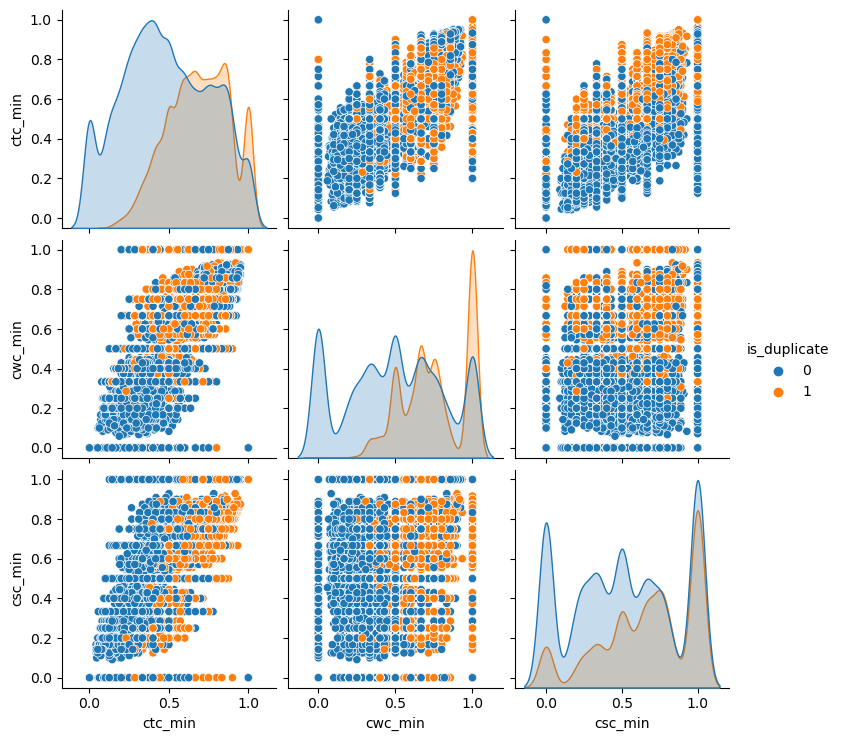

In [57]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

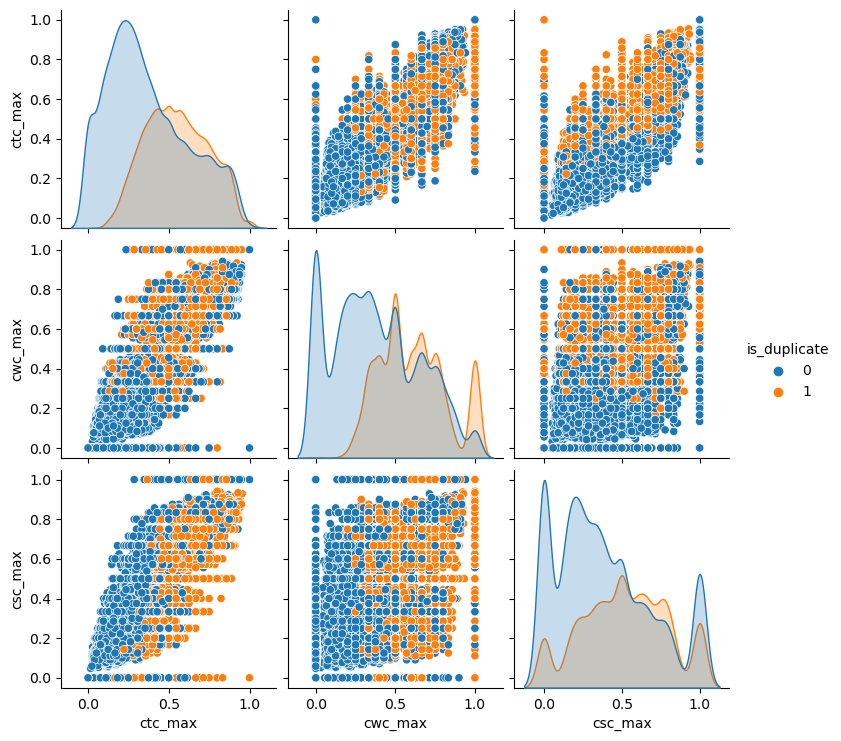

In [58]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

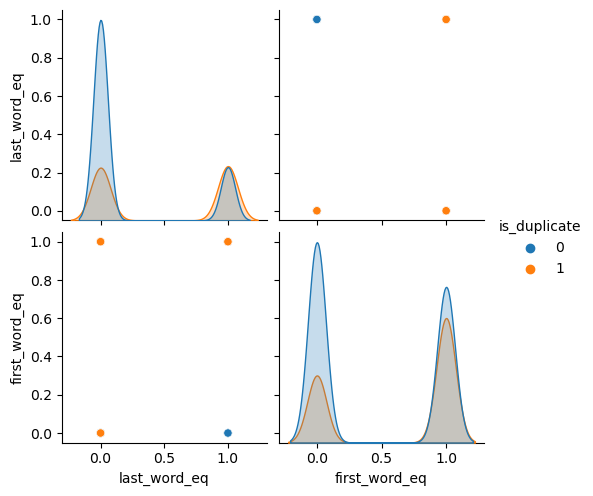

In [59]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

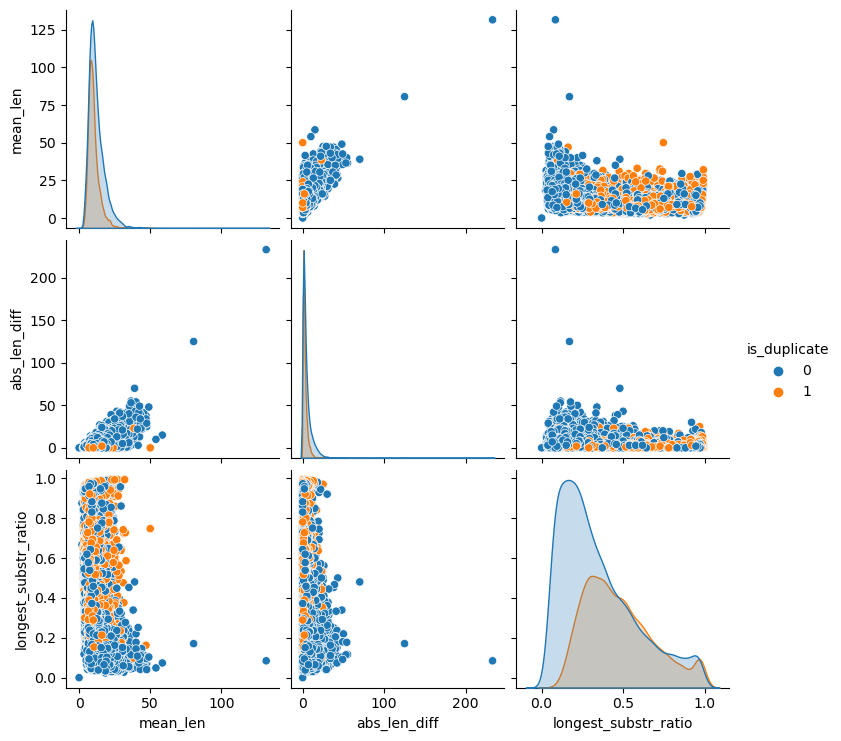

In [60]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

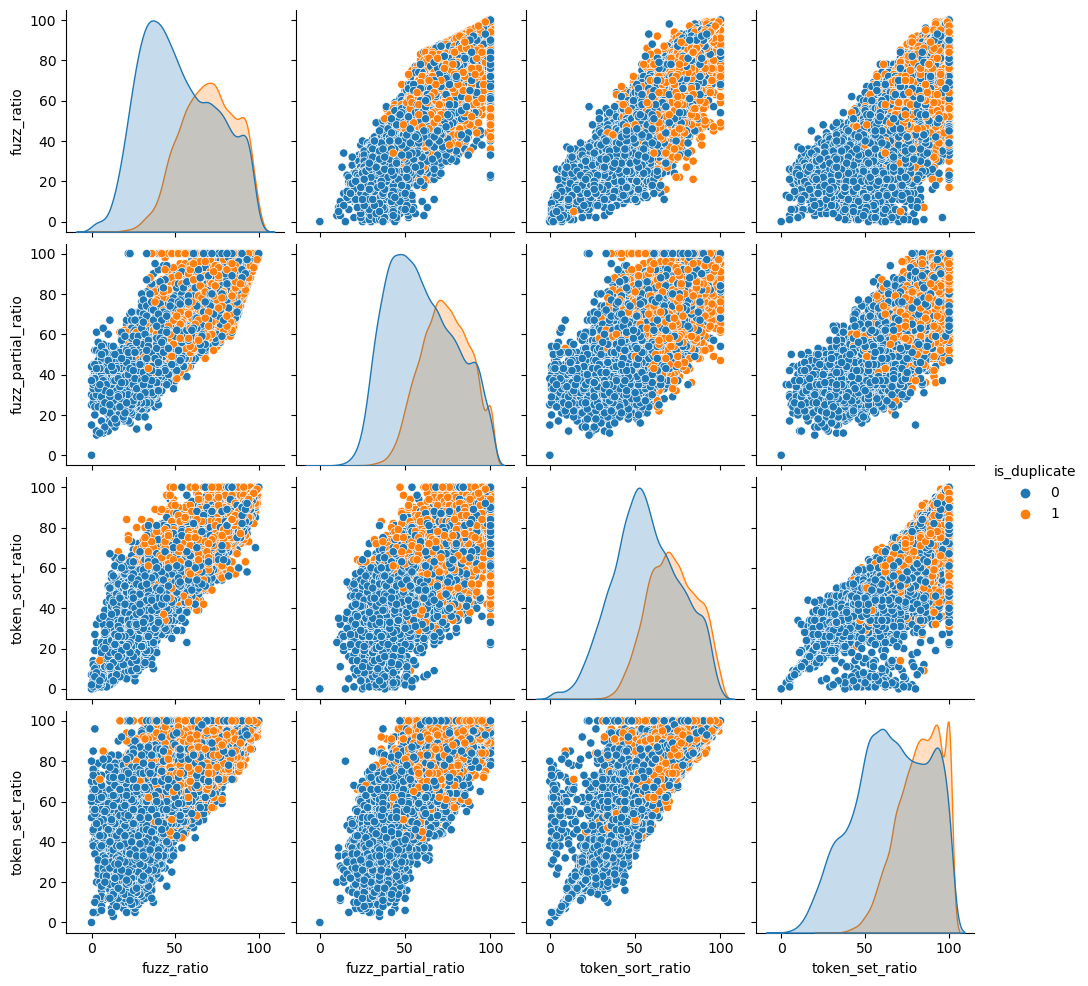

In [64]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

### Code Explanation

1. **Scaling the Features:**
   - The code uses `MinMaxScaler().fit_transform(...)` to scale the selected 15 features from the `new_df` DataFrame.
   - The features being scaled include: `cwc_min`, `cwc_max`, `csc_min`, `csc_max`, `ctc_min`, `ctc_max`, `last_word_eq`, `first_word_eq`, `abs_len_diff`, `mean_len`, `token_set_ratio`, `token_sort_ratio`, `fuzz_ratio`, `fuzz_partial_ratio`, and `longest_substr_ratio`.
   - This scaling ensures that each feature has values in the range [0, 1], normalizing the data to prevent any feature from having undue influence due to its numeric range.

2. **Extracting the Target Variable:**
   - The target variable `is_duplicate` is extracted from the `new_df` DataFrame using `new_df['is_duplicate'].values`.
   - This step retrieves the target values as a NumPy array, which will be used for training machine learning models or for further processing in the pipeline.


In [65]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [66]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.178s...
[t-SNE] Computed neighbors for 30000 samples in 14.879s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

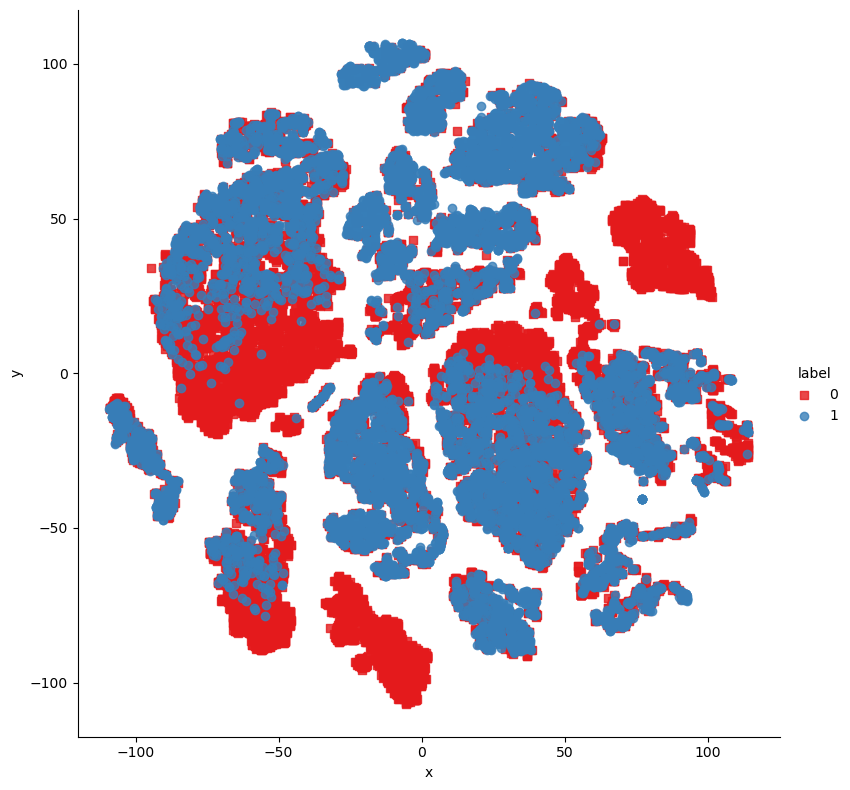

In [69]:
x_df = pd.DataFrame({'x': tsne2d[:, 0], 'y': tsne2d[:, 1], 'label': y})

# Draw the plot in the appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, height=8, palette="Set1", markers=['s', 'o'])


### Explanation of t-SNE for 3D Dimensionality Reduction

The t-Distributed Stochastic Neighbor Embedding (t-SNE) algorithm is used to reduce the dimensionality of data while preserving its structure. In this case, it is applied to reduce the dataset from 15 features to 3 dimensions.

- **`n_components=3`**: This specifies that the data should be reduced to 3 dimensions. It allows for visualization in a 3D space.

- **`init='random'`**: This initializes the t-SNE algorithm with random positions for the data points. An alternative is to use `'pca'`, which initializes with principal component analysis to potentially improve convergence.

- **`random_state=101`**: Setting a random seed ensures that the results can be reproduced. It stabilizes the initialization of the algorithm.

- **`method='barnes_hut'`**: This method uses the Barnes-Hut approximation, which speeds up the computation, especially for large datasets, by approximating the t-SNE cost function.

- **`n_iter=1000`**: The number of iterations for the optimization process. More iterations usually lead to better results but require more computational time.

- **`verbose=2`**: Provides detailed progress information during the optimization process, helping to monitor the algorithm’s progress.

- **`angle=0.5`**: This parameter controls the trade-off between accuracy and speed. A lower angle provides more accurate results but requires more computation.

The output of this function is a 2D NumPy array where each row represents a data point transformed into the 3D space, suitable for visualization or further analysis.


In [70]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.166s...
[t-SNE] Computed neighbors for 30000 samples in 13.684s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

In [71]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [72]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
398782  what is the best marketing automation tool for...   
115086    i am poor but i want to invest what should i do   
327711  i am from india and live abroad i met a guy fr...   
367788  why do so many people in the u s hate the sout...   
151235                 consequences of bhopal gas tragedy   

                                                question2  
398782  what is the best marketing automation tool for...  
115086  i am quite poor and i want to be very rich wha...  
327711  t i e t to thapar university to thapar univers...  
367788  my boyfriend doesnt feel guilty when he hurts ...  
151235  what was the reason behind the bhopal gas tragedy

In [73]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
398782             1      75      76            13            13           12   
115086             0      47      55            12            15            7   
327711             0     102     118            26            20            3   
367788             0      57     143            13            30            0   
151235             0      34      49             5             9            3   

        word_total  word_share   cwc_min   cwc_max  ...   ctc_max  \
398782          26        0.46  0.874989  0.874989  ...  0.923070   
115086          22        0.32  0.666644  0.499988  ...  0.466664   
327711          36        0.08  0.000000  0.000000  ...  0.115384   
367788          32        0.00  0.000000  0.000000  ...  0.000000   
151235          13        0.23  0.749981  0.599988  ...  0.333330   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782           1.0            1.0           0.0      13.0   
115086           1.0            1.0           3.0      13.5   
327711           0.0            0.0           6.0      23.0   
367788           0.0            0.0          17.0      21.5   
151235           1.0            0.0           4.0       7.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
398782              0.855263          99                  99   
115086              0.229167          69                  66   
327711              0.048544          26                  30   
367788              0.051724          27                  46   
151235              0.542857          55                  70   

        token_sort_ratio  token_set_ratio  
398782                99               99  
115086                65               74  
327711                34               43  
367788                23               30  
151235                48               69  

[5 rows x 23 columns]

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [75]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [76]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
398782             1      75      76            13            13           12   
115086             0      47      55            12            15            7   
327711             0     102     118            26            20            3   
367788             0      57     143            13            30            0   
151235             0      34      49             5             9            3   

        word_total  word_share   cwc_min   cwc_max  ...  2990  2991  2992  \
398782          26        0.46  0.874989  0.874989  ...     0     0     0   
115086          22        0.32  0.666644  0.499988  ...     0     0     0   
327711          36        0.08  0.000000  0.000000  ...     0     0     0   
367788          32        0.00  0.000000  0.000000  ...     0     0     0   
151235          13        0.23  0.749981  0.599988  ...     0     0     0   

        2993  2994  2995  2996  2997  2998  2999  
398782     0     0     0     0     0     0     0  
115086     0     0     0     0     0     0     0  
327711     0     0     0     0     0     0     0  
367788     1     0     0     0     0     0     0  
151235     0     0     0     0     0     0     0  

[5 rows x 6023 columns]

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)    here

0.7858333333333334

In [79]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7973333333333333

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[3285,  527],
       [ 758, 1430]], dtype=int64)

In [83]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[3247,  565],
       [ 651, 1537]], dtype=int64)

In [84]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [85]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

### Explanation of `test_fetch_token_features` Function

The `test_fetch_token_features` function computes several token-based features between two questions (`q1` and `q2`). These features help quantify the similarity between the two questions by analyzing their token content, including words and stopwords.

- **`SAFE_DIV = 0.0001`**: A small value added to denominators to avoid division by zero errors.

- **`STOP_WORDS`**: A set of common stopwords in English (e.g., 'and', 'the', 'is') which are often removed during text processing.

- **Token Features Initialization**: 
  - Initializes `token_features` as a list of 8 zeros. This will store the calculated features.

- **Converting Sentences into Tokens**:
  - `q1_tokens` and `q2_tokens` are lists of words from `q1` and `q2`, respectively, obtained by splitting the strings on whitespace.

- **Handling Empty Tokens**:
  - If either question has no tokens, the function returns the initialized zero-valued features list.

- **Identifying Non-Stopwords and Stopwords**:
  - `q1_words` and `q2_words` are sets of non-stopword tokens from `q1` and `q2`.
  - `q1_stops` and `q2_stops` are sets of stopword tokens from `q1` and `q2`.

- **Common Word and Stopword Counts**:
  - `common_word_count`: The number of common non-stopwords between `q1` and `q2`.
  - `common_stop_count`: The number of common stopwords between `q1` and `q2`.
  - `common_token_count`: The number of common tokens (both stopwords and non-stopwords) between `q1` and `q2`.

- **Calculating Token Features**:
  - **`token_features[0]`**: Ratio of common non-stopwords to the minimum count of non-stopwords between the two questions.
  - **`token_features[1]`**: Ratio of common non-stopwords to the maximum count of non-stopwords between the two questions.
  - **`token_features[2]`**: Ratio of common stopwords to the minimum count of stopwords between the two questions.
  - **`token_features[3]`**: Ratio of common stopwords to the maximum count of stopwords between the two questions.
  - **`token_features[4]`**: Ratio of common tokens to the minimum number of tokens between the two questions.
  - **`token_features[5]`**: Ratio of common tokens to the maximum number of tokens between the two questions.

- **Checking Word Similarity**:
  - **`token_features[6]`**: Checks if the last word of both questions is the same (returns 1 if true, otherwise 0).
  - **`token_features[7]`**: Checks if the first word of both questions is the same (returns 1 if true, otherwise 0).


In [87]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [88]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [89]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

### Explanation of `query_point_creator` Function

1. **Function Definition:**
   - Defines a function named `query_point_creator` that takes two input arguments, `q1` and `q2`, which represent the pair of questions to be analyzed.

2. **Initialize Input Query List:**
   - Creates an empty list called `input_query` to store the features that will be generated for the input questions.

3. **Preprocess Questions:**
   - Calls a `preprocess` function on both questions, which standardizes the text (such as lowercasing, removing punctuation, etc.).

4. **Fetch Basic Features:**
   - Adds the length of `q1` and `q2` (number of characters) to the `input_query` list to capture the size of each question.

5. **Add Word Count Features:**
   - Adds the number of words in `q1` and `q2` by splitting each question on spaces, giving insight into the question structure.

6. **Common and Total Word Features:**
   - Computes the number of common words and the total number of words between the two questions.
   - Adds the ratio of common words to total words, rounded to two decimal places, to indicate the level of similarity.

7. **Fetch Token Features:**
   - Calls `test_fetch_token_features` to generate features based on tokens (words) like matching tokens, matching stopwords, etc.
   - Extends the `input_query` list with these token-based features.

8. **Fetch Length-Based Features:**
   - Calls `test_fetch_length_features` to generate features related to the length of the questions, like the difference in length, average length, and longest common substring ratio.
   - Extends the `input_query` list with these length-based features.

9. **Fetch Fuzzy Features:**
   - Calls `test_fetch_fuzzy_features` to generate fuzzy matching features using methods like fuzz ratio, partial ratio, token sort ratio, and token set ratio to measure text similarity.
   - Extends the `input_query` list with these fuzzy matching features.

10. **Bag of Words (BoW) Features for q1:**
    - Converts `q1` into a Bag of Words representation using a CountVectorizer (`cv`), which creates a sparse matrix indicating the frequency of words in the question.

11. **Bag of Words (BoW) Features for q2:**
    - Similarly, converts `q2` into a Bag of Words representation using the same CountVectorizer.

12. **Combine All Features:**
    - Combines all the extracted features into a single feature vector using `np.hstack` (horizontal stack).
    - The `input_query` list is reshaped to a 1x22 array and concatenated with the BoW features of `q1` and `q2`.
    - Returns the final feature vector, which can be used for modeling or prediction tasks.


In [90]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [97]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'
q5 = 'What is the current capital of India?'

In [94]:
query_point_creator(q1,q2)

array([[29., 39.,  6., ...,  0.,  0.,  0.]])

In [ ]:
#It will give me numpy array 

In [95]:
query_point_creator(q1,q2).shape

(1, 6022)

In [98]:
rf.predict(query_point_creator(q1,q5))   #2questions are same(Duplicate)thats why it gives results as 1

array([1], dtype=int64)

 **Model Prediction: `rf.predict(...)`**
   - The `predict` method of the random forest model (`rf`) is called with the feature vector produced by `query_point_creator`.
   - The `rf` model uses the feature vector to make a prediction. Since it's a classification problem (likely determining whether two questions are duplicates), the model outputs a class label.

In [99]:
rf.predict(query_point_creator(q1,q2))   #2questions are Different thats why it gives results as 0

array([0], dtype=int64)

 **Model Prediction: `rf.predict(...)`**
   - The `predict` method of the random forest model (`rf`) is called with the feature vector produced by `query_point_creator`.
   - The `rf` model uses the feature vector to make a prediction. Since it's a classification problem (likely determining whether two questions are duplicates), the model outputs a class label.

In [100]:
cv

CountVectorizer(max_features=3000)

In [101]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))